# Introduction to Python
Ported to python from http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/intro_to_r/intro_to_r.html

First, we need to import the libraries that we need. By convention, we apply aliases that we can use to reference the libraries later. `pandas` contains classes for working working with `Series` and `DataFrame`. These are very similar to `list` and `data.frame` in R. `numpy` contains a number of mathematical and statistical functions.

In [2]:
import pandas as pd
import numpy as np

Now we will load the arbuthnot.csv file into a pandas `DataFrame`. 

In [3]:
arbuthnot = pd.read_csv("arbuthnot.csv")

## The Data: Dr. Arbuthnot’s Baptism Records
The Arbuthnot data set refers to Dr. John Arbuthnot, an 18th century physician, writer, and mathematician. He was interested in the ratio of newborn boys to newborn girls, so he gathered the baptism records for children born in London for every year from 1629 to 1710. We can take a look at the data by typing its name into the console. Adding `.head()` will return just the first few rows of the data.

In [4]:
arbuthnot.head()

,year,boys,girls
0,1629,5218,4683
1,1630,4858,4457
2,1631,4422,4102
3,1632,4994,4590
4,1633,5158,4839


What you should see are four columns of numbers, each row representing a different year: the first entry in each row is simply the row number (an index we can use to access the data from individual years if we want), the second is the year, and the third and fourth are the numbers of boys and girls baptized that year, respectively. Use the scrollbar on the right side of the console window to examine the complete data set.

Note that the row numbers in the first column are not part of Arbuthnot’s data. Pandas adds them as an index that can be used to identify the columns. You can think of them as the index that you see on the left side of a spreadsheet. In fact, the comparison to a spreadsheet will generally be helpful. Python has stored Arbuthnot’s data in a kind of spreadsheet or table called a data frame.

You can see the dimensions of this data frame by typing:

In [5]:
arbuthnot.shape

(82, 3)

This command should output (82 3), indicating that there are 82 rows and 3 columns. You can see the names of these columns (or variables) by typing:

In [6]:
arbuthnot.columns

Index(['year', 'boys', 'girls'], dtype='object')

You should see that the data frame contains the columns year, boys, and girls. 

## Some Exploration
Let’s start to examine the data a little more closely. We can access the data in a single column of a data frame (a pandas `Series`) separately using a command like

In [7]:
arbuthnot['boys']

0     5218
1     4858
2     4422
3     4994
4     5158
5     5035
6     5106
7     4917
8     4703
9     5359
10    5366
11    5518
12    5470
13    5460
14    4793
15    4107
16    4047
17    3768
18    3796
19    3363
20    3079
21    2890
22    3231
23    3220
24    3196
25    3441
26    3655
27    3668
28    3396
29    3157
      ... 
52    6822
53    6909
54    7577
55    7575
56    7484
57    7575
58    7737
59    7487
60    7604
61    7909
62    7662
63    7602
64    7676
65    6985
66    7263
67    7632
68    8062
69    8426
70    7911
71    7578
72    8102
73    8031
74    7765
75    6113
76    8366
77    7952
78    8379
79    8239
80    7840
81    7640
Name: boys, Length: 82, dtype: int64

Note, you could have also used `arbuthnot.boys`, but the square bracket syntax is preferrable as the . syntax won't work in all cases.

**Exercise 1** What command would you use to extract just the counts of girls baptized? Try it!

In [4]:
arbuthnot['girls']

0     4683
1     4457
2     4102
3     4590
4     4839
5     4820
6     4928
7     4605
8     4457
9     4952
10    4784
11    5332
12    5200
13    4910
14    4617
15    3997
16    3919
17    3395
18    3536
19    3181
20    2746
21    2722
22    2840
23    2908
24    2959
25    3179
26    3349
27    3382
28    3289
29    3013
      ... 
52    6533
53    6744
54    7158
55    7127
56    7246
57    7119
58    7214
59    7101
60    7167
61    7302
62    7392
63    7316
64    7483
65    6647
66    6713
67    7229
68    7767
69    7626
70    7452
71    7061
72    7514
73    7656
74    7683
75    5738
76    7779
77    7417
78    7687
79    7623
80    7380
81    7288
Name: girls, Length: 82, dtype: int64

Notice that the way pandas has printed these data is different. When we looked at the complete data frame, we saw 82 rows, one on each line of the display with a column header at the top. These data are no longer structured in a table with other variables, so they have no column header. pandas has added numbers along the left side of the printout to indicate locations within the Series. For example, `5218` follows `0`, indicating that `5218` is the first entry in the vector. And if `43` starts a line, then that would mean the first number on that line would represent the 43rd entry in the vector.

The library that is the basis of most of the plotting that we will do is matplotlib. This can be imported using 

In [5]:
import matplotlib.pyplot as plt

pandas uses matplotlib behind the scenes to do some of it's own built in plotting. Another plotting library that we will see eventually is seaborn, which also utilizes matplotlib. 

We can create a simple plot of the number of girls baptized per year with the command below. This will draw the plot on a matplotlib axes. We need to use matplotlib to actually show the plot.

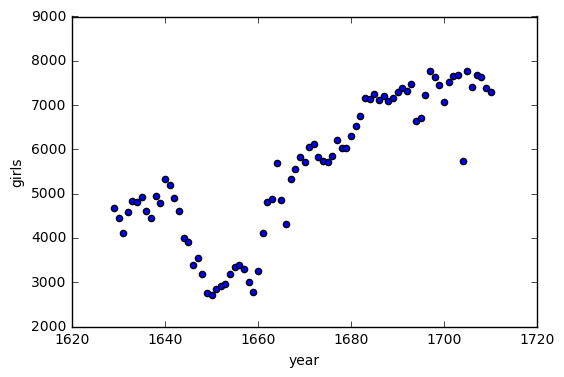

In [4]:
arbuthnot.plot.scatter(x='year', y='girls')
plt.show()

The code above creates a scatterplot with each x,y pair indicated by a circle. If we wanted to connect the data points with lines, we could use the line plot type. Note how a legend is added for us automatically.

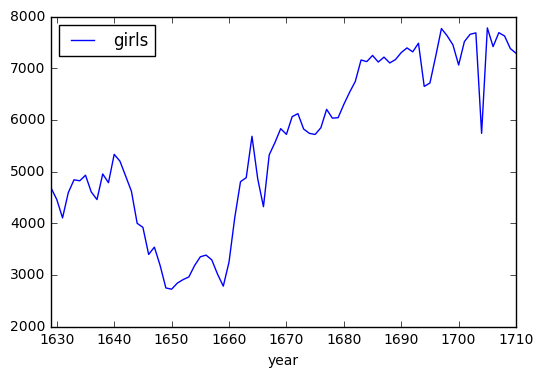

In [5]:
arbuthnot.plot.line(x='year', y='girls')
plt.show()

Most libraries in python document their functions extensively. To read what a function does and learn the arguments that are available to you, just type in a question mark followed by the name of the function that you’re interested in. Try the following.

In [23]:
?arbuthnot.plot

**Exercise 2** Is there an apparent trend in the number of girls baptized over the years?
How would you describe it?

There was a drop from 1640 to 1650, and then an increase from 1660 to 1710.

Now, suppose we want to plot the total number of baptisms. To compute this, we could use the fact that python supports mathematical functions. We can type in mathematical expressions like

In [24]:
5218 + 4683

9901

to see the total number of baptisms in 1629. We could repeat this once for each year, but there is a faster way. If we add the Series for baptisms for boys and girls, python will compute all sums simultaneously.

In [28]:
arbuthnot['boys'] + arbuthnot['girls']

0      9901
1      9315
2      8524
3      9584
4      9997
5      9855
6     10034
7      9522
8      9160
9     10311
10    10150
11    10850
12    10670
13    10370
14     9410
15     8104
16     7966
17     7163
18     7332
19     6544
20     5825
21     5612
22     6071
23     6128
24     6155
25     6620
26     7004
27     7050
28     6685
29     6170
      ...  
52    13355
53    13653
54    14735
55    14702
56    14730
57    14694
58    14951
59    14588
60    14771
61    15211
62    15054
63    14918
64    15159
65    13632
66    13976
67    14861
68    15829
69    16052
70    15363
71    14639
72    15616
73    15687
74    15448
75    11851
76    16145
77    15369
78    16066
79    15862
80    15220
81    14928
Length: 82, dtype: int64

What you will see are 82 numbers, each one representing the sum we’re after. Take a look at a few of them and verify that they are right. Therefore, we can make a plot of the total number of baptisms per year. However, because we want to plot a Series that is not part of the DataFrame, we cannot use the pandas built in plot. However, we can use matplotlib directly with the command

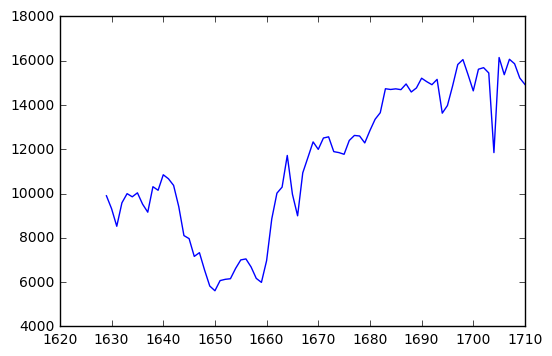

In [6]:
plt.plot(arbuthnot['year'], arbuthnot['boys'] + arbuthnot['girls'])
plt.show()

Similarly to how we computed the proportion of boys, we can compute the ratio of the number of boys to the number of girls baptized in 1629 with

In [7]:
5218 / 4683

1.1142430066196882

or we can act on the complete vectors with the expression

In [8]:
arbuthnot['boys'] / arbuthnot['girls']

0     1.114243
1     1.089971
2     1.078011
3     1.088017
4     1.065923
5     1.044606
6     1.036120
7     1.067752
8     1.055194
9     1.082189
10    1.121656
11    1.034884
12    1.051923
13    1.112016
14    1.038120
15    1.027521
16    1.032661
17    1.109867
18    1.073529
19    1.057215
20    1.121267
21    1.061719
22    1.137676
23    1.107290
24    1.080095
25    1.082416
26    1.091371
27    1.084565
28    1.032533
29    1.047793
        ...   
52    1.044237
53    1.024466
54    1.058536
55    1.062860
56    1.032846
57    1.064054
58    1.072498
59    1.054359
60    1.060974
61    1.083128
62    1.036526
63    1.039092
64    1.025792
65    1.050850
66    1.081931
67    1.055748
68    1.037981
69    1.104904
70    1.061594
71    1.073219
72    1.078254
73    1.048981
74    1.010673
75    1.065354
76    1.075460
77    1.072132
78    1.090022
79    1.080808
80    1.062331
81    1.048299
Length: 82, dtype: float64

The proportion of newborns that are boys

In [9]:
5218 / (5218 + 4683)

0.527017472982527

or this may also be computed for all years simultaneously:

In [10]:
arbuthnot['boys'] / (arbuthnot['boys'] + arbuthnot['girls'])

0     0.527017
1     0.521524
2     0.518771
3     0.521077
4     0.515955
5     0.510908
6     0.508870
7     0.516383
8     0.513428
9     0.519736
10    0.528670
11    0.508571
12    0.512652
13    0.526519
14    0.509352
15    0.506787
16    0.508034
17    0.526037
18    0.517730
19    0.513906
20    0.528584
21    0.514968
22    0.532202
23    0.525457
24    0.519253
25    0.519789
26    0.521845
27    0.520284
28    0.508003
29    0.511669
        ...   
52    0.510820
53    0.506043
54    0.514218
55    0.515236
56    0.508079
57    0.515517
58    0.517490
59    0.513230
60    0.514792
61    0.519953
62    0.508968
63    0.509586
64    0.506366
65    0.512397
66    0.519677
67    0.513559
68    0.509318
69    0.524919
70    0.514938
71    0.517658
72    0.518827
73    0.511953
74    0.502654
75    0.515821
76    0.518179
77    0.517405
78    0.521536
79    0.519417
80    0.515112
81    0.511790
Length: 82, dtype: float64

Note that with python as with your calculator, you need to be conscious of the order of operations. Here, we want to divide the number of boys by the total number of newborns, so we have to use parentheses. Without them, python will first do the division, then the addition, giving you something that is not a proportion.

**Exercise 3** Now, make a plot of the proportion of boys over time. What do you see?

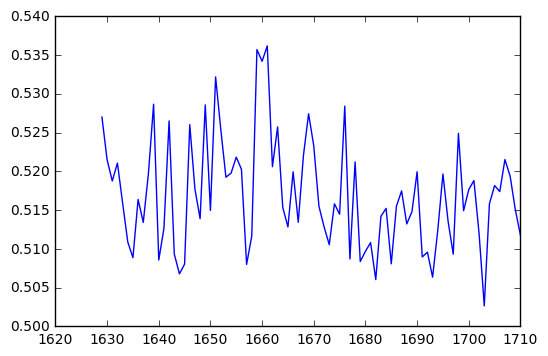

In [6]:
plt.plot(arbuthnot['year'], arbuthnot['boys'] / (arbuthnot['boys'] + arbuthnot['girls']))
plt.show()

Finally, in addition to simple mathematical operators like subtraction and division, you can ask R to make comparisons like greater than, >, less than, <, and equality, ==. For example, we can ask if boys outnumber girls in each year with the expression

In [12]:
arbuthnot['boys'] > arbuthnot['girls']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
      ... 
52    True
53    True
54    True
55    True
56    True
57    True
58    True
59    True
60    True
61    True
62    True
63    True
64    True
65    True
66    True
67    True
68    True
69    True
70    True
71    True
72    True
73    True
74    True
75    True
76    True
77    True
78    True
79    True
80    True
81    True
Length: 82, dtype: bool

This command returns 82 values of either `True` if that year had more boys than girls, or `False` if that year did not (the answer may surprise you). This output shows a different kind of data than we have considered so far. In the arbuthnot data frame our values are numerical (the year, the number of boys and girls). Here, we’ve asked python to create logical data, data where the values are either `True` or `False`. In general, data analysis will involve many different kinds of data types, and one reason for using python is that it is able to represent and compute with many of them.

This seems like a fair bit for your first lab, so let’s stop here. 

# On Your Own
In the previous few pages, you recreated some of the displays and preliminary analysis of Arbuthnot’s baptism data. Your assignment involves repeating these steps, but for present day birth records in the United States. Load up the present day data into a `DataFrame` called `present` with the following command.

In [14]:
present = pd.read_csv('present.csv')

1. What years are included in this data set? What are the dimensions of the data frame and what are the variable or column names?
2. How do these counts compare to Arbuthnot’s? Are they on a similar scale?
3. Make a plot that displays the boy-to-girl ratio for every year in the data set. What do you see? Does Arbuthnot’s observation about boys being born in greater proportion than girls hold up in the U.S.? Include the plot in your response.
4. In what year did we see the most total number of births in the U.S.? You can refer to the help files or the R reference card http://cran.r-project.org/doc/contrib/Short-refcard.pdf to find helpful commands.

These data come from a report by the Centers for Disease Control http://www.cdc.gov/nchs/data/nvsr/nvsr53/nvsr53_20.pdf. Check it out if you would like to read more about an analysis of sex ratios at birth in the United States.

That was a short introduction to python, pandas, and matplotlib, but we will provide you with more functions and a more complete sense of the language as the course progresses. Feel free to browse around the websites for python if you’re interested in learning more, or find more labs for practice at http://openintro.org.

In [15]:
present.head()

,year,boys,girls
0,1940,1211684,1148715
1,1941,1289734,1223693
2,1942,1444365,1364631
3,1943,1508959,1427901
4,1944,1435301,1359499


In [17]:
present.mean()

year     1.971000e+03
boys     1.885600e+06
girls    1.793915e+06
dtype: float64

In [18]:
arbuthnot.mean()

year     1669.500000
boys     5907.097561
girls    5534.646341
dtype: float64

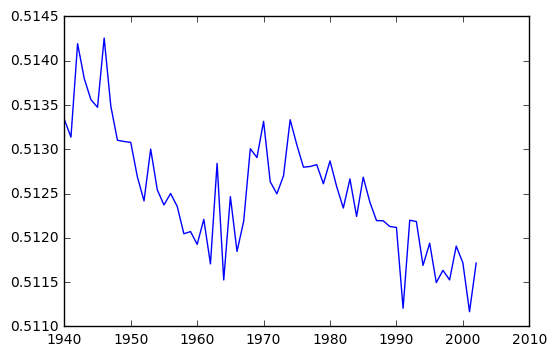

In [20]:
plt.plot(present['year'], present['boys'] / (present['boys'] + present['girls']))
plt.show()

In [23]:
present['total'] = present['boys'] + present['girls']

In [24]:
present['total'].idxmax()

21

In [25]:
present.iloc[21]

year        1961
boys     2186274
girls    2082052
total    4268326
Name: 21, dtype: int64

*This notebook is based on the OpenIntro R lab [Introduction to R and RStudio](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/intro_to_r/intro_to_r.html).*